In [1]:
import sys
import os

if "/Users/shvimas/GitHub/diploma/src" not in sys.path:
    sys.path.append("/Users/shvimas/GitHub/diploma/src")
    
os.chdir("/Users/shvimas/GitHub/diploma")

In [117]:
%matplotlib inline
import matplotlib.pyplot as pl
import data_helpers as dh
import helper_funcs as hf
import compare_models as cmp
import numpy as np
import pandas as pd
import itertools as it
import collections as coll


pl.style.use('ggplot')
pl.rcParams["figure.figsize"] = (15, 10)   

In [3]:
pl.rcParams["figure.figsize"] = (15, 10)

In [4]:
scores_per_dot = cmp.get_scores()   

In [115]:
bad_metric = {
    'he with vg': 1,
    'he with ls': 1,
    'vg with he': 1.5,
    'vg with ls': 2.0,
    'ls with he': 5,
    'ls with vg': 5
}

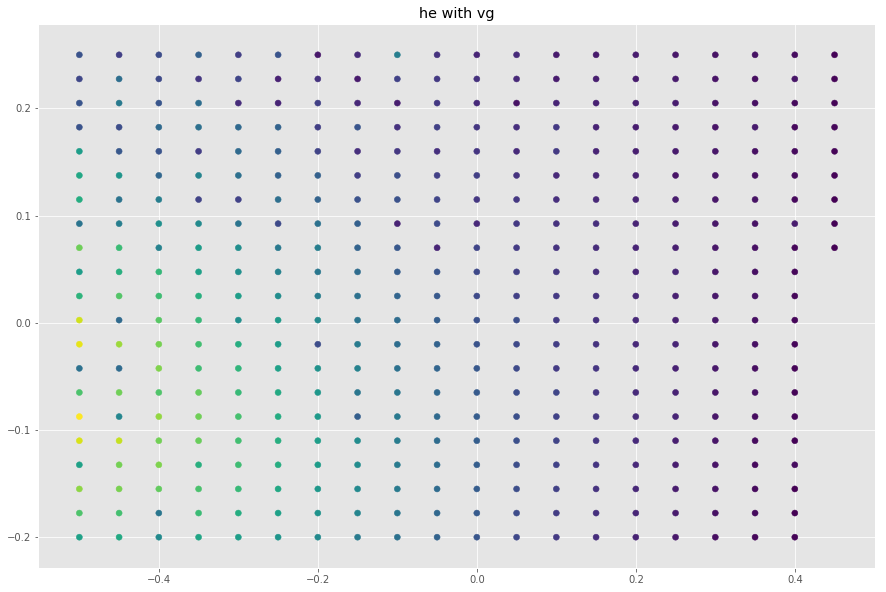

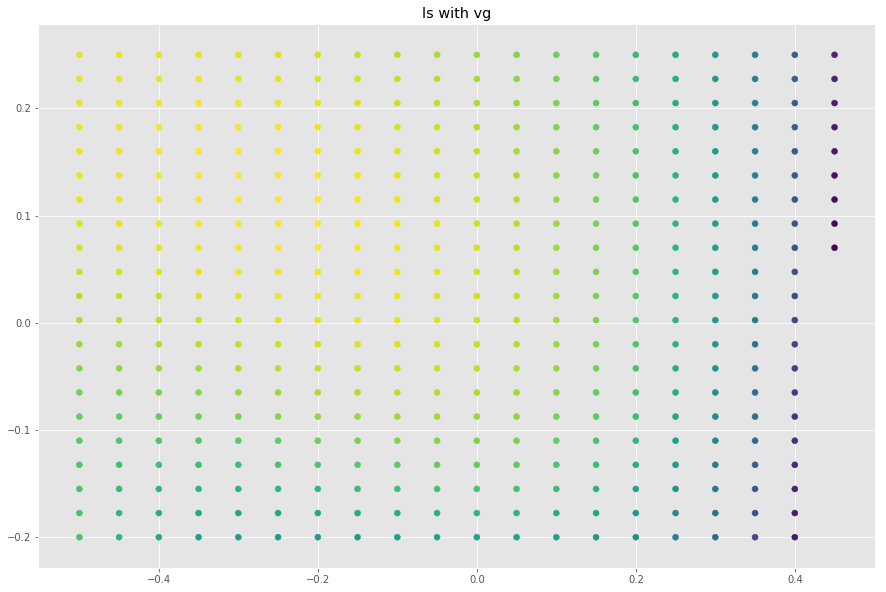

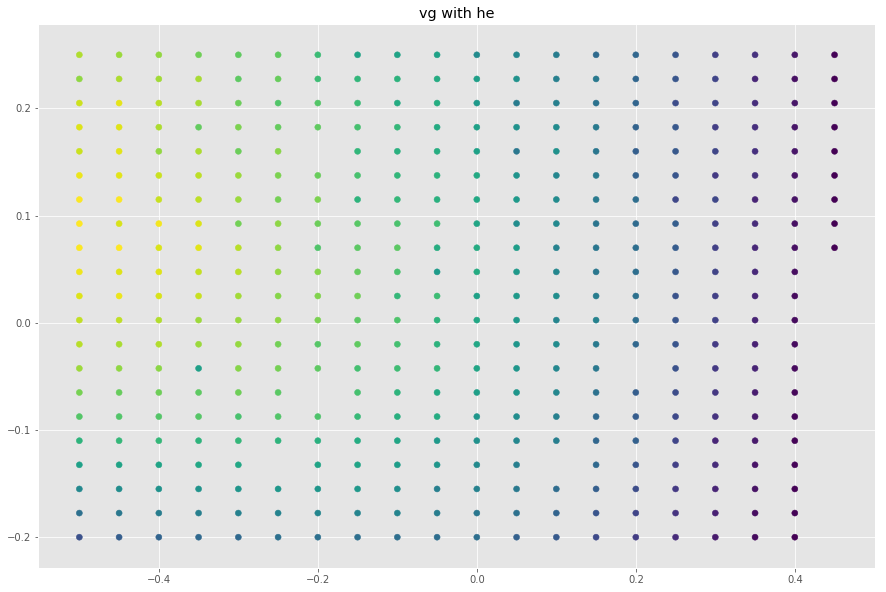

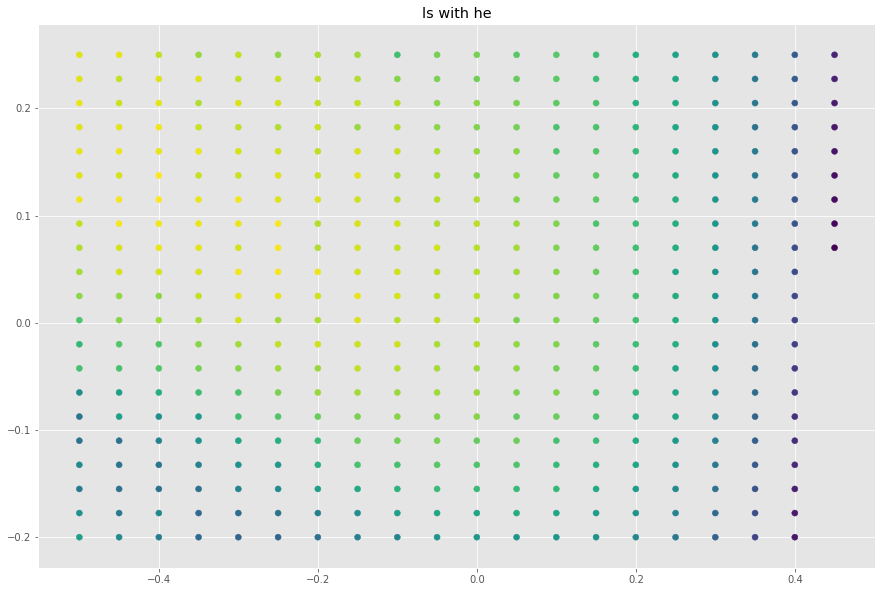

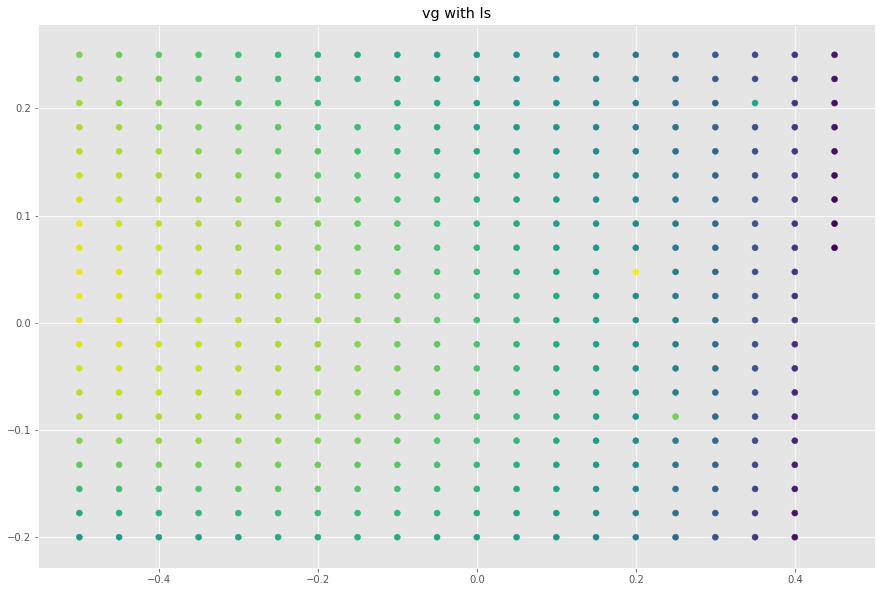

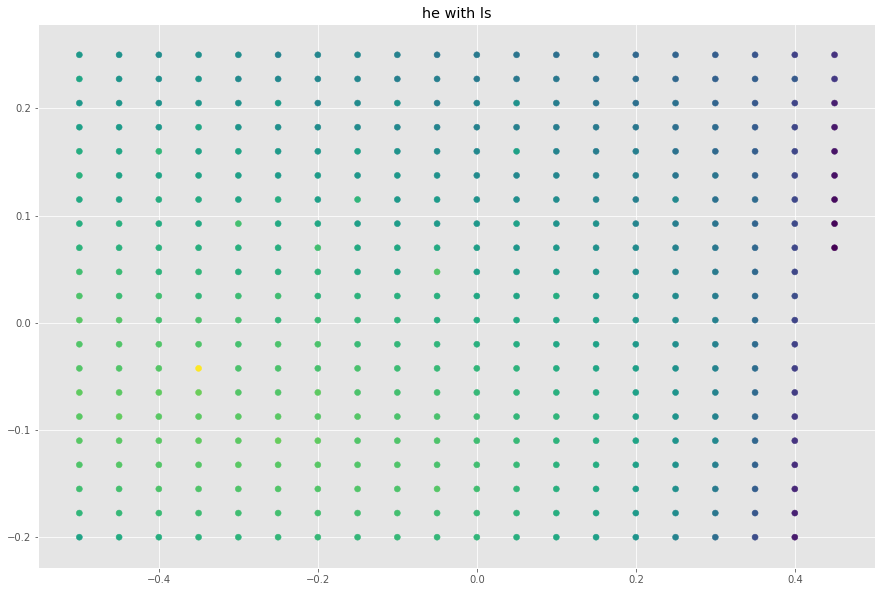

In [123]:
vg_dots = cmp.vg_initial_dots
bounds, factors, means = dh.get_pca_data('vg')
dots_2d = (vg_dots - means) @ factors.transpose()
global_scores = {
    'he': np.zeros(len(dots_2d)), 
    'vg': np.zeros(len(dots_2d)), 
    'ls': np.zeros(len(dots_2d))
}
sum_scores = np.zeros(len(dots_2d))

for model1, model2 in it.permutations(cmp.models, 2):
    name = f"{model2} with {model1}"
    scores = list(map(lambda el: el[1][name], scores_per_dot))
    global_scores[model2] += scores
    sum_scores += scores

    df = pd.DataFrame(dots_2d, columns=['x', 'y'], )
    df['score'] = scores

    df = df[df.score < bad_metric[name]]

    pl.title(name)
    pl.scatter(df['x'], df['y'], c=df['score'])
    pl.show()

In [125]:
for m in cmp.models:
    global_scores[m] /= sum_scores

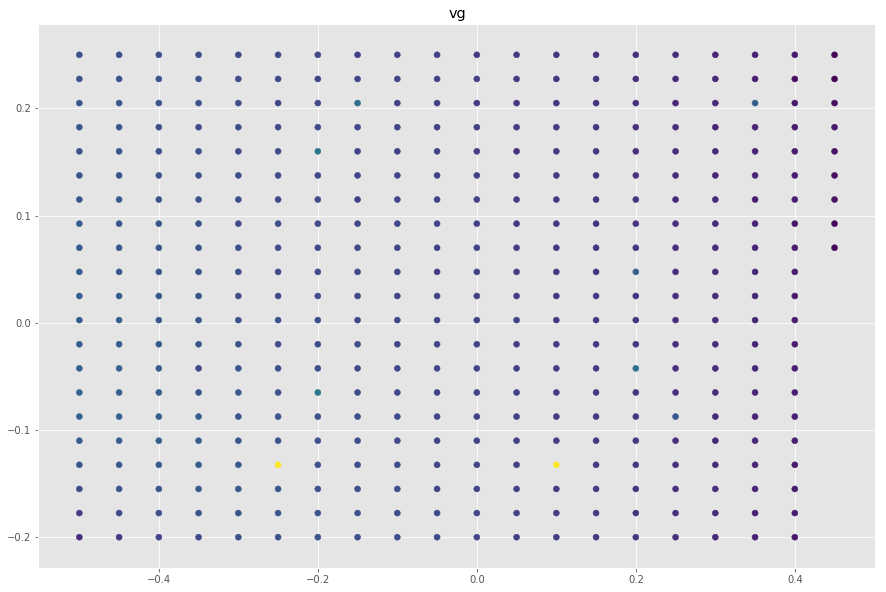

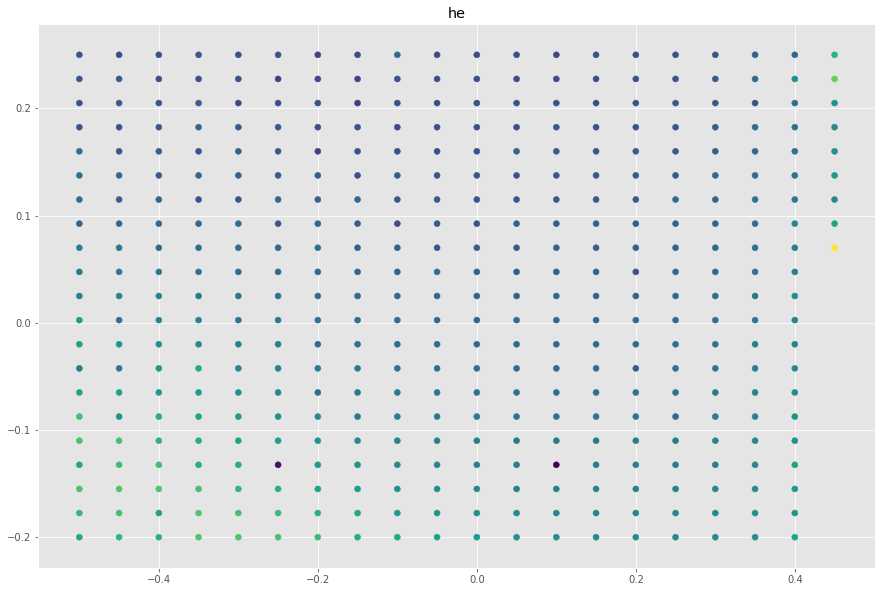

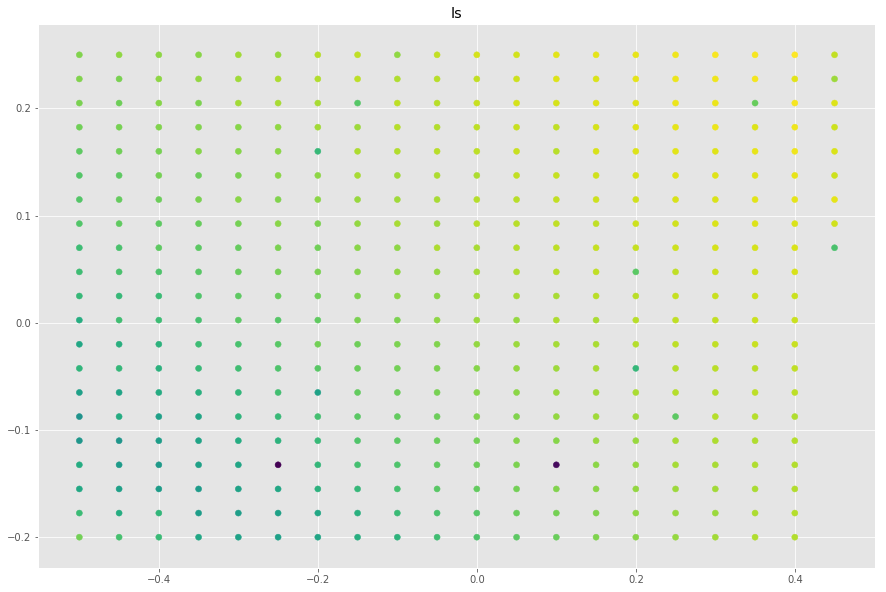

In [135]:
for m in cmp.models:
    df = pd.DataFrame(dots_2d, columns=['x', 'y'])
    pl.title(m)
    pl.scatter(df.x, df.y, c=list(global_scores[m]))
    pl.show()